# week 7 IP regression on real estate housing

In [96]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import zscore
%matplotlib inline 

In [97]:
df=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [98]:
#checking the data types used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [99]:
# checking for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

data has no null values

In [100]:
#dropping the id column 
df.drop('id',axis=1, inplace=True)

In [101]:
print('The dataset has ',df.shape[0],'rows and',df.shape[1],'columns.')

The dataset has  21613 rows and 19 columns.


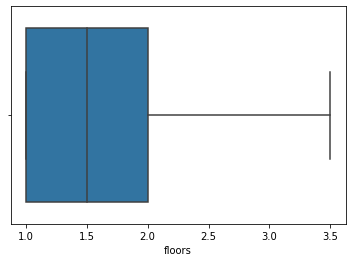

In [102]:
# checking for outliers 
sns.boxplot(df['floors'])

11

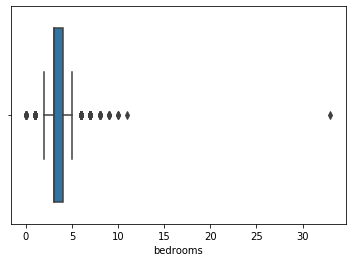

In [103]:
#removing the outlier in bedrooms
sns.boxplot(df['bedrooms'])
df.drop(df.loc[df['bedrooms']>20].index, inplace=True)
df['bedrooms'].max()

In [104]:
# cleaning the price
df.drop(df.loc[df['price']>4000000].index, inplace=True)
df['price'].max()

4000000.0

# exploratory analysis

(array([7.569e+03, 1.068e+04, 2.814e+03, 4.410e+02, 7.500e+01, 2.000e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <a list of 10 Patch objects>)

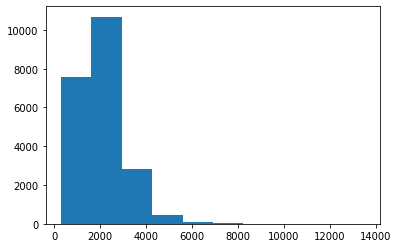

In [105]:
# plotting a histogramfor the living in square feet
plt.hist(df['sqft_living'])
# most homes have a living space of about 2,000sqft

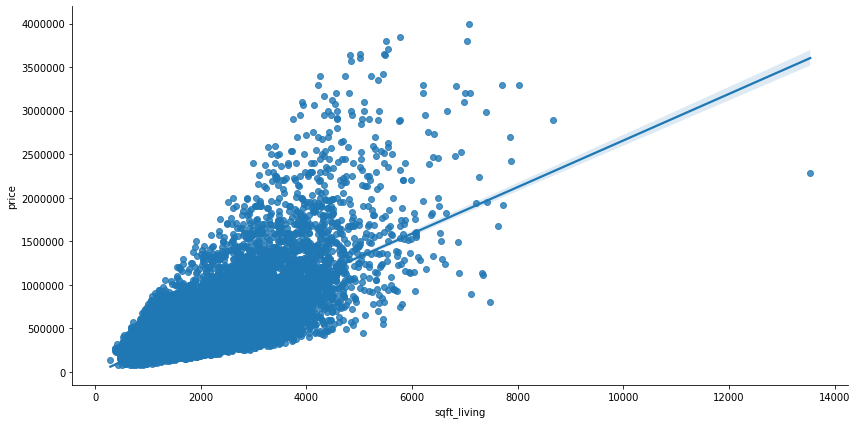

In [106]:
# plotting to see relationship between living space and price
sns.lmplot(x='sqft_living',y='price',data=df,aspect=2,height=6)
# the larger the living space is, the higher the price

[Text(0.5, 1.0, 'Distribution of Prices')]

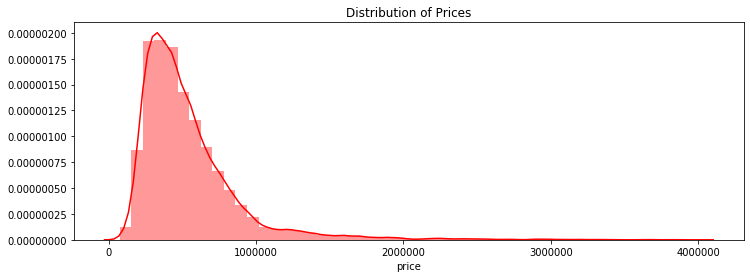

In [107]:
#checking the price distribution
fig=plt.figure(figsize=(12,4))
sns.distplot(df['price'],bins=50,color='r').set(title='Distribution of Prices')

The price distribution is skewed.

In [108]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160100e+04,21601.000000,21601.000000,21601.000000,2.160100e+04,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000
mean,5.376356e+05,3.368548,2.112911,2076.594741,1.509991e+04,1.494097,0.007314,0.233091,3.409472,7.654599,1785.995000,290.599741,1970.998796,84.171520,98077.956761,47.560012,-122.213882,1985.600157,12764.115921
std,3.488493e+05,0.907198,0.765325,906.037577,4.143016e+04,0.539976,0.085213,0.763623,0.650755,1.171260,820.773698,439.868286,29.371449,401.152954,53.504029,0.138586,0.140862,684.070048,27310.189685
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.066900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000
max,4.000000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [126]:
from sklearn.model_selection import train_test_split

X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

# Use 80% of the data to train
sqft_train, sqft_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [127]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(sqft_train, price_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

[-18620.06398965]
[[267.75446512]]


In [128]:
price_predict = regressor.predict(sqft_test)

outcome_comparison = pd.DataFrame({'Actual': price_predict.flatten(), 'Predicted': price_predict.flatten()})

outcome_comparison.describe()

,Actual,Predicted
count,4.321000e+03,4.321000e+03
mean,5.390350e+05,5.390350e+05
std,2.450747e+05,2.450747e+05
min,8.419765e+04,8.419765e+04
25%,3.682851e+05,3.682851e+05
50%,4.954685e+05,4.954685e+05
75%,6.614763e+05,6.614763e+05
max,3.606775e+06,3.606775e+06


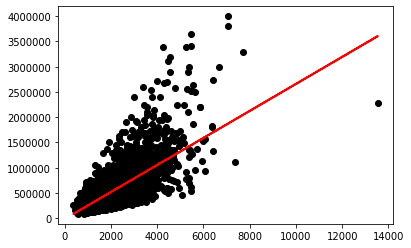

In [129]:
# plotting the 
plt.scatter(sqft_test,price_test, color='black')
plt.plot(sqft_test,price_predict, color='red', linewidth=2)
plt.show()

In [130]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(price_test, price_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(price_test, price_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(price_test, price_predict)))  


Mean Absolute Error: 171414.86618279136
Mean Squared Error: 65930118997.32472
Root Mean Squared Error: 256768.60983641422


## multiple linear regretion

In [131]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [133]:
import statsmodels.formula.api as smf

mod = smf.quantreg('sqft_living ~ price', df)
res = mod.fit(q=.5)
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:            sqft_living   Pseudo R-squared:               0.2641
Model:                       QuantReg   Bandwidth:                       108.2
Method:                 Least Squares   Sparsity:                        1567.
Date:                Sat, 16 Oct 2021   No. Observations:                21601
Time:                        16:36:42   Df Residuals:                    21599
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    995.6992      9.793    101.674      0.000     976.504    1014.894
price          0.0019   1.53e-05    124.838      0.000       0.002       0.002

The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


/home/francis/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [151]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['price']] + res.conf_int().loc['price'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/home/francis/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/home/francis/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/home/francis/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


    qt    intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   590.700634  0.001331        0.001297        0.001366
1  0.2   708.612109  0.001519        0.001487        0.001551
2  0.3   791.056067  0.001681        0.001650        0.001711
3  0.4   892.394370  0.001803        0.001772        0.001834
4  0.5   995.699183  0.001908        0.001878        0.001938
5  0.6  1085.146185  0.002058        0.002029        0.002088
6  0.7  1089.715569  0.002309        0.002280        0.002337
7  0.8  1297.051237  0.002424        0.002393        0.002455
8  0.9   560.734584  0.003838        0.003814        0.003862


/home/francis/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


# lasso regression

In [159]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [162]:
# scaling the data
#Importing StandardScaler

from sklearn.preprocessing import StandardScaler


X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']]
y = df[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [163]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5458980872607775
lasso MSE: 55259746521.763336
lasso coef: [-34529.17855754 -11492.19179857 184168.49892745 -12336.06440279
 -19521.68183085 126511.22245763]


In [164]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5325796962740663
linear score: 0.5325728030604016
lasso MSE: 54680570680.26728
linear MSE: 54681377074.11454
lasso best estimator coef: [-34576.15286043 -11903.23434725 188142.26260036 -11454.54173848
 -19867.80972612 126451.29134349]
linear coef: [[-34624.98158508 -11986.68250409 188249.8209209  -11489.62730409
  -19892.79494429 126481.73287499]]


/home/francis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/francis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/francis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449321709707257.25, tolerance: 199680042503.75674
  positive)


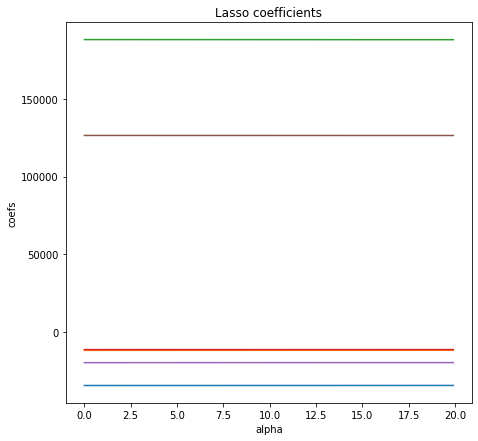

In [167]:
#plotting the Lasso coefficient
coefsLasso = [] 

# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# ridge regretion

In [168]:
fresh_X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']]
fresh_y = df[['price']]

In [169]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [187]:
#baseline regretion
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

55259746508.14648


In [175]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [190]:
# getting the best parameters
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

55537584985.84348

In [191]:
# confirming the model 
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=fresh_y,y_pred=ridge.predict(X)))
print(second_model)

55270182998.21239


ridge regretion has a lower score than the linear regretion baseline score.

# elastic net regretion

In [182]:
# base regretion 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

55259746508.14648


In [183]:
# importing the elastic net lib
from sklearn.linear_model import ElasticNet

In [184]:
# elastic net regretion
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [185]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)

55537584985.84348

In [186]:
# elatic net is doing better than liner regretion since it is higher than the base set by the linear